<a href="https://colab.research.google.com/github/sakethlingerker/Neural-netwoks-on-MNIST/blob/main/cifar_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [13]:
 X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]#this is a 2D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)#now its changes to 1D aray
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

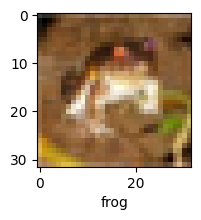

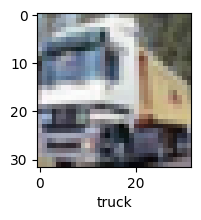

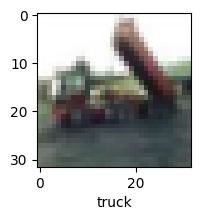

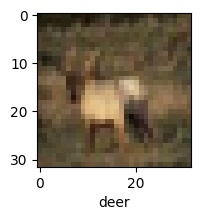

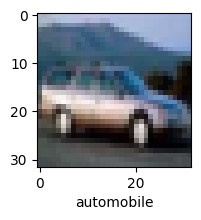

In [15]:
for i in range(5):
  plot_sample(X_train, y_train, i)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
ann=models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000,activation='relu'),
      layers.Dense(1000,activation='relu'),
      layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.3051 - loss: 1.9284
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 81ms/step - accuracy: 0.4195 - loss: 1.6479
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 82ms/step - accuracy: 0.4543 - loss: 1.5519
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 85ms/step - accuracy: 0.4751 - loss: 1.4901
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 85ms/step - accuracy: 0.4927 - loss: 1.4336


In [18]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4756 - loss: 1.5058


[1.5133826732635498, 0.4684000015258789]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.64      0.41      0.50      1000
           1       0.64      0.59      0.61      1000
           2       0.29      0.51      0.37      1000
           3       0.39      0.23      0.29      1000
           4       0.42      0.37      0.39      1000
           5       0.46      0.30      0.36      1000
           6       0.45      0.61      0.52      1000
           7       0.42      0.68      0.52      1000
           8       0.58      0.64      0.61      1000
           9       0.71      0.34      0.46      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [20]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.3506 - loss: 1.7836
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.5649 - loss: 1.2346
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6180 - loss: 1.0955
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6519 - loss: 1.0060
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6763 - loss: 0.9381
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6942 - loss: 0.8838
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7077 - loss: 0.8451
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.7204 - loss: 0.7996
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7313 - loss: 0.7725
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.7405 - loss: 0.7457


In [21]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6789 - loss: 0.9298


[0.9401946067810059, 0.6801999807357788]

In [23]:
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification report: \n",classification_report(y_test,y_pred_classes))



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.87      0.73      0.80      1000
           2       0.56      0.58      0.57      1000
           3       0.52      0.47      0.49      1000
           4       0.72      0.51      0.60      1000
           5       0.57      0.59      0.58      1000
           6       0.76      0.77      0.76      1000
           7       0.68      0.75      0.71      1000
           8       0.74      0.83      0.78      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [32]:
y_pred_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [33]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

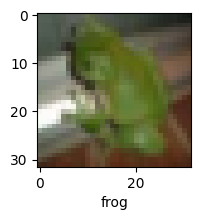

In [34]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,7)

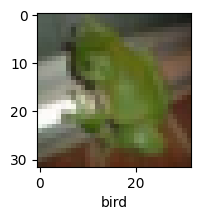

In [35]:
plot_sample(X_test,y_pred_classes,7)

In [38]:
predicted=classes[y_pred_classes [7]]
original=classes[y_test[7]]
print("predicted: "+predicted)
print("original: "+original)

predicted: bird
original: frog
